In [1]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [3]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [4]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [5]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [6]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [7]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [8]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [9]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length   Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.40   Min.   :2.000   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.10   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300   versicolor:40  
 Median :5.75   Median :3.000   Median :4.350   Median :1.300   virginica :40  
 Mean   :5.84   Mean   :3.042   Mean   :3.766   Mean   :1.202                  
 3rd Qu.:6.40   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.90   Max.   :4.400   Max.   :6.900   Max.   :2.500                  

In [10]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

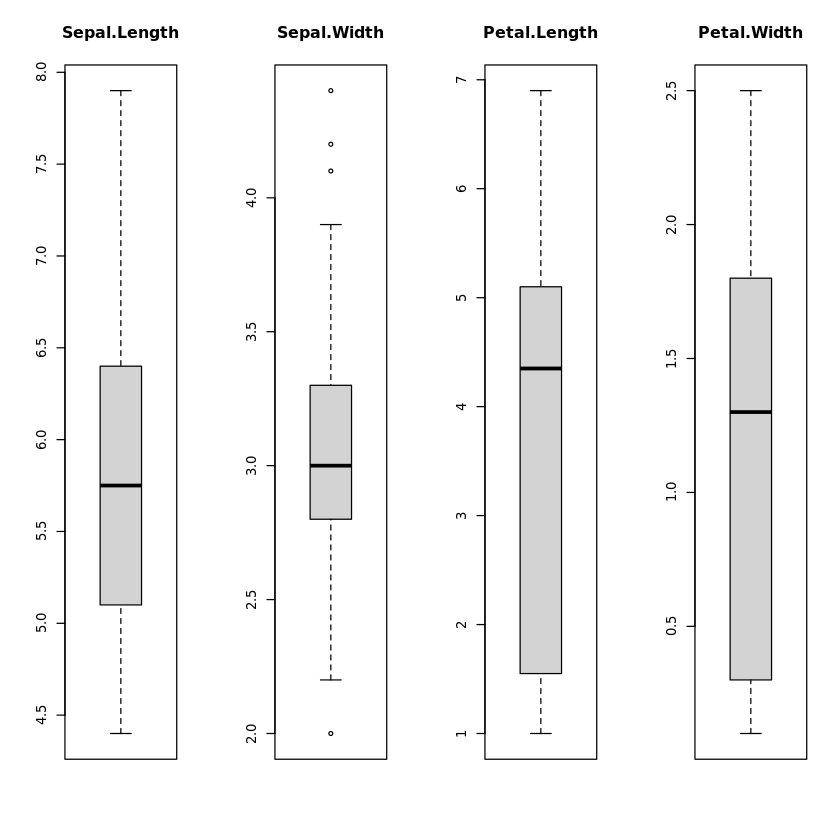

In [11]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

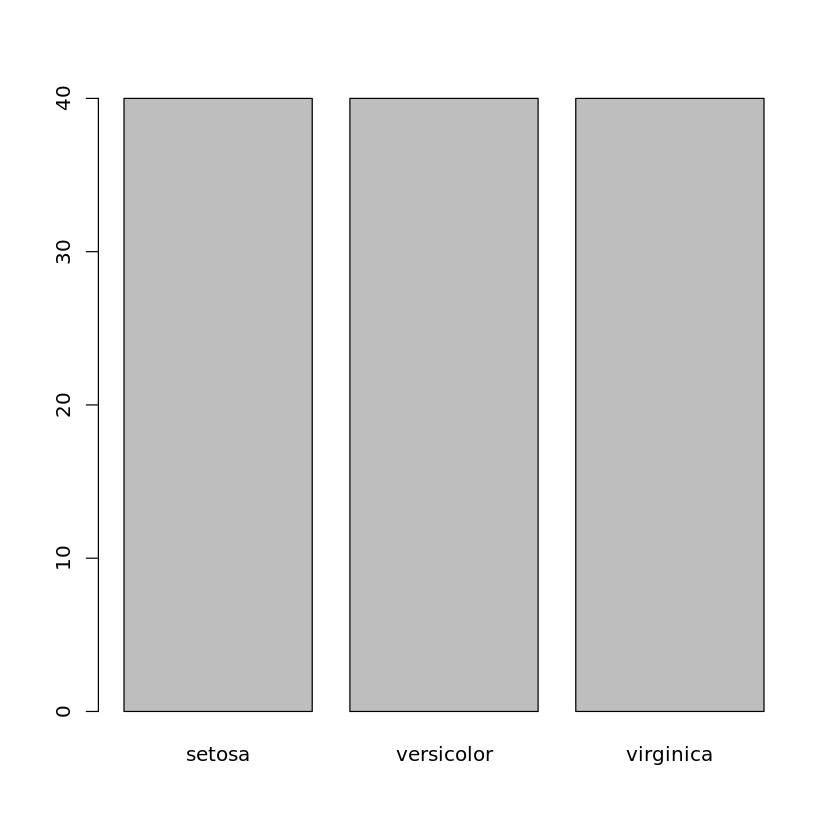

In [12]:
# barplot for class breakdown
plot(y)

In [17]:
install.packages("ellipse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [18]:
library(ellipse)


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




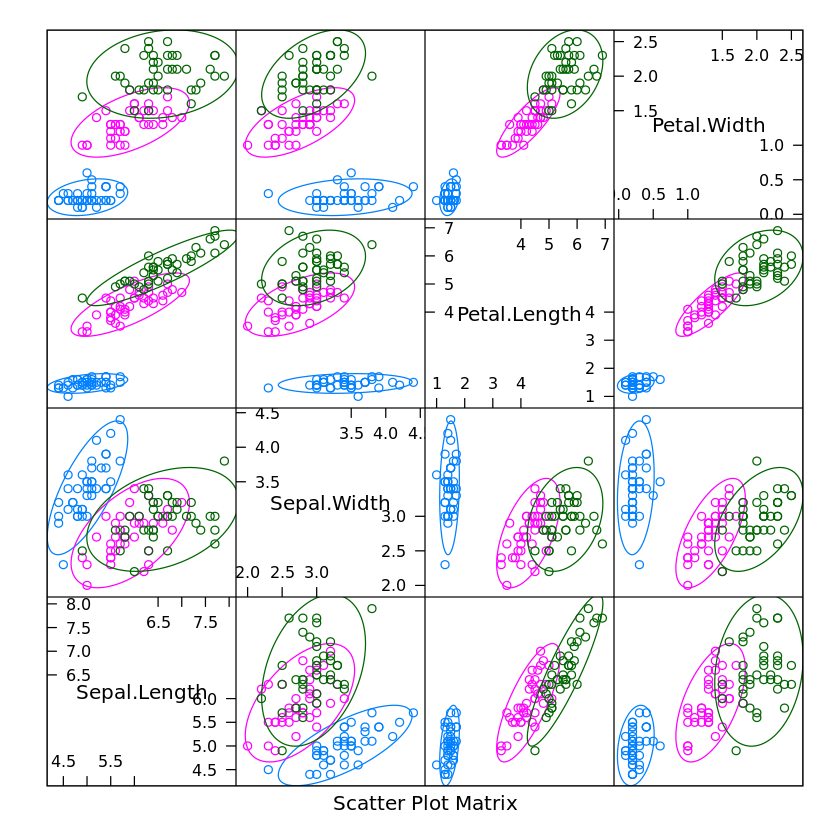

In [19]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")